In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import LambdaCallback
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_dim = 28
y_dim = 28
scale = 2.0

In [4]:
model = Sequential([
    Dense(32, input_dim=3+10, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(0.0005), loss='mse')

In [5]:
def create_grid(x_dim=32, y_dim=32, scale=1.0):
    n_points = x_dim * y_dim
    x_range = scale*(np.arange(x_dim)-(x_dim-1)/2.0)/(x_dim-1)/0.5
    y_range = scale*(np.arange(y_dim)-(y_dim-1)/2.0)/(y_dim-1)/0.5
    x_mat = np.matmul(np.ones((y_dim, 1)), x_range.reshape((1, x_dim)))
    y_mat = np.matmul(y_range.reshape((y_dim, 1)), np.ones((1, x_dim)))
    r_mat = np.sqrt(x_mat*x_mat + y_mat*y_mat)
    x_mat = x_mat.flatten().reshape((n_points, 1))
    y_mat = y_mat.flatten().reshape((n_points, 1))
    r_mat = r_mat.flatten().reshape((n_points, 1))
    return x_mat, y_mat, r_mat

In [6]:
def generate_data(label=None, x_dim=x_dim, y_dim=y_dim):
    random_label = label == None and True or False
    while True:
        idx = np.random.randint(x_train.shape[0])
        # todo: change dataset format to index by label
        if not random_label:
            while y_train[idx] != label:
                idx = np.random.randint(x_train.shape[0])
        label = y_train[idx]
        x_vec, y_vec, r_vec = create_grid(x_dim, y_dim, scale)
        if label == None:
            label = y_train[idx]
        label_vec = np.zeros((10,))
        label_vec[label] = 1.
        label_vec = np.tile(label_vec, x_vec.shape[0]).reshape((-1, 10))
        batch_x = np.concatenate([x_vec, y_vec, r_vec, label_vec], axis=-1)
        batch_y = x_train[idx].reshape((-1, 1))/255.
        yield (batch_x, batch_y)

9


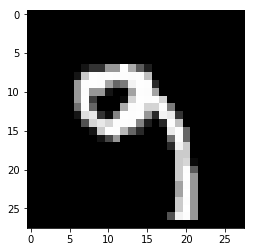

7


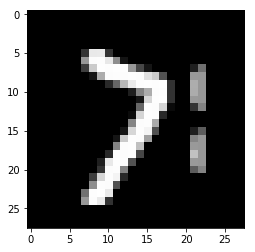

In [7]:
g = generate_data()
for _ in range(2):
    bx, by = next(g)
    print(np.argmax(bx[0, 3:3+10]))
    img = by.reshape((y_dim, x_dim, 1))
    img = np.repeat(img, 3, axis=-1)
    img = (img*255).astype(np.uint8)
    img = Image.fromarray(img)
    plt.imshow(img)
    plt.show()

average class images (what's being optimized for without a variance model)
0


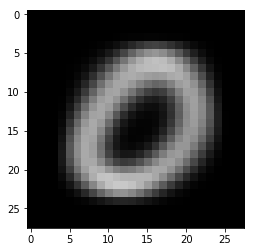

1


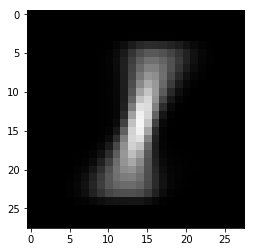

2


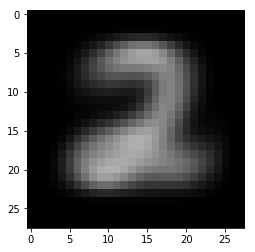

3


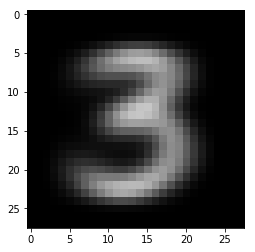

4


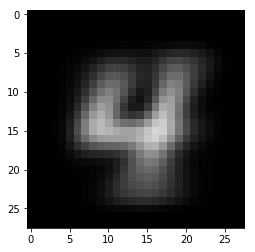

5


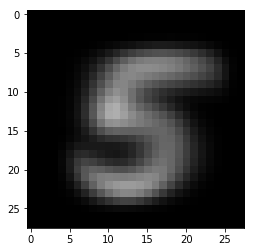

6


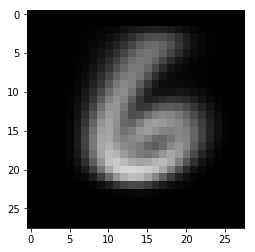

7


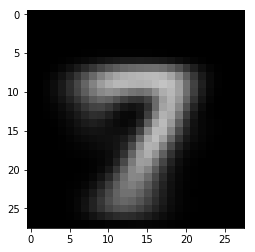

8


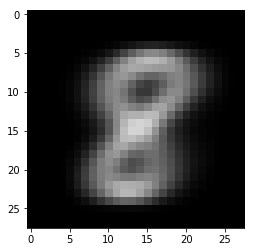

9


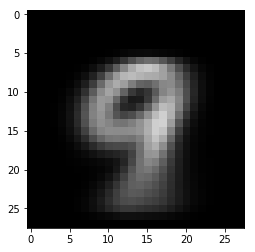

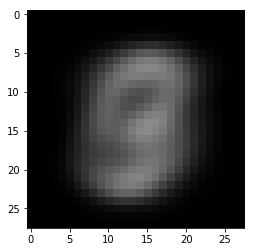

In [8]:
print('average class images (what\'s being optimized for without a variance model)')
l = [[] for _ in range(10)]
for i in range(x_train.shape[0]):
    l[y_train[i]].append(x_train[i])
for i in range(10):
    print(i)
    img = np.array(l[i]).mean(axis=0)/255.
    img = img.reshape((y_dim, x_dim, 1))
    img = np.repeat(img, 3, axis=-1)
    img = (img*255).astype(np.uint8)
    img = Image.fromarray(img)
    plt.imshow(img)
    plt.show()
img = np.array(np.concatenate(l, axis=0)).mean(axis=0)/255.
img = img.reshape((y_dim, x_dim, 1))
img = np.repeat(img, 3, axis=-1)
img = (img*255).astype(np.uint8)
img = Image.fromarray(img)
plt.imshow(img)
plt.show()

In [9]:
def generate(label=None, x_dim=x_dim, y_dim=y_dim):
    time_s = time.time()
    bx, _ = next(generate_data(label, x_dim, y_dim))
    print(np.argmax(bx[0, 3:3+10]))
    pred = model.predict(bx)
    img = pred.reshape((y_dim, x_dim, 1))
    img = np.repeat(img, 3, axis=-1)
    img = (img*255).astype(np.uint8)
    img = Image.fromarray(img)
    plt.imshow(img)
    plt.show()
    print('generated in {0:.2f} seconds'.format(time.time() - time_s))

Epoch 1/3
4000/4000 [==============================] - 24s 6ms/step - loss: 0.0639
1


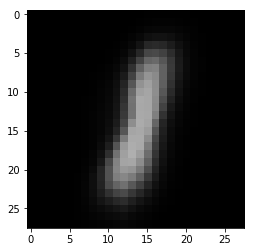

generated in 0.21 seconds
Epoch 2/3
4000/4000 [==============================] - 22s 6ms/step - loss: 0.0561
0


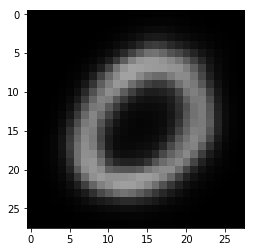

generated in 0.17 seconds
Epoch 3/3
4000/4000 [==============================] - 22s 5ms/step - loss: 0.0552
4


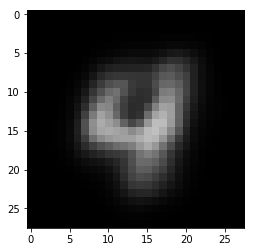

generated in 0.17 seconds


In [10]:
model.fit_generator(generate_data(), steps_per_epoch=4e3, epochs=3,
    callbacks=[
        LambdaCallback(on_epoch_end=lambda epoch, logs: generate())
    ])

generating at 256x256
0


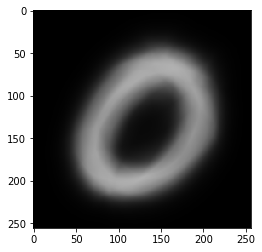

generated in 2.74 seconds
1


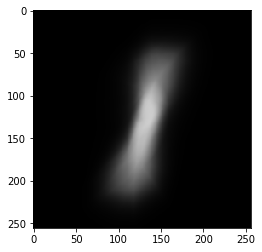

generated in 2.29 seconds
2


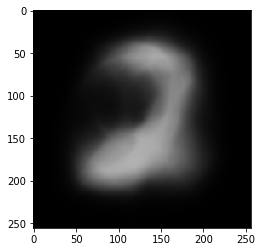

generated in 2.86 seconds
3


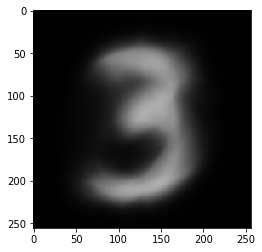

generated in 2.60 seconds
4


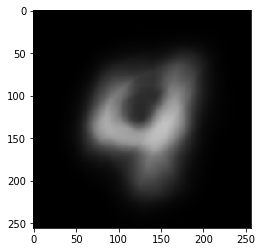

generated in 2.72 seconds
5


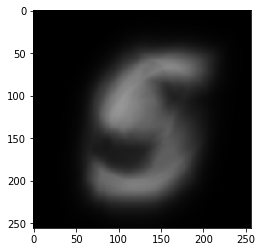

generated in 3.26 seconds
6


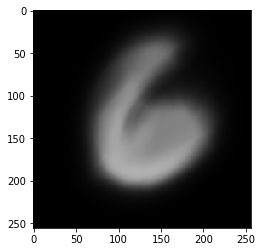

generated in 2.40 seconds
7


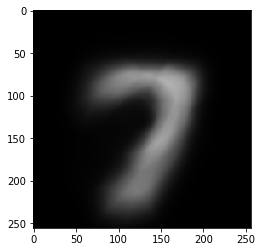

generated in 2.46 seconds
8


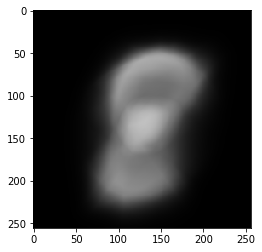

generated in 3.24 seconds
9


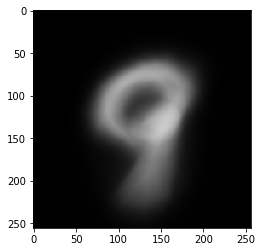

generated in 2.50 seconds


In [11]:
print('generating at 256x256')
for i in range(10):
    generate(i, 256, 256)